In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from word2number import w2n

In [54]:
df = pd.read_csv("hiring.csv")
df

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [55]:
df.experience = df.experience.fillna("zero")
df

,experience,test_score,interview_score,salary
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [56]:
df.experience = df.experience.apply(w2n.word_to_num)
df

,experience,test_score,interview_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [57]:
import math

med_test_score = math.floor(df.test_score.median())

df.test_score = df.test_score.fillna(med_test_score)
df

,experience,test_score,interview_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [58]:
reg = linear_model.LinearRegression()
reg.fit(df[['experience', 'test_score', 'interview_score']], df.salary)


LinearRegression()

In [59]:
reg.predict([[2,9,6]])

c:\Users\Mayank\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53205.96797671])

In [60]:
reg.predict([[12,10,10]])

c:\Users\Mayank\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92002.18340611])

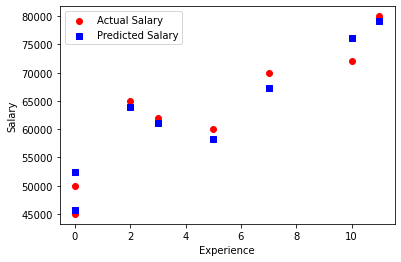

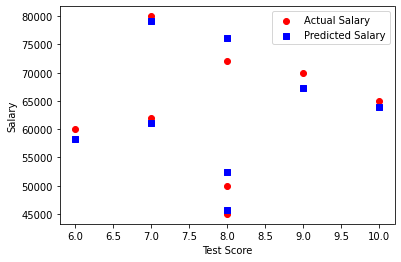

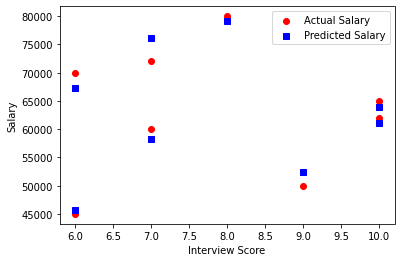

In [61]:
plt.scatter(df.experience, df.salary, color='red', marker='o', label='Actual Salary')
plt.scatter(df.experience, reg.predict(df[['experience', 'test_score', 'interview_score']]), color='blue', marker='s', label='Predicted Salary')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

plt.scatter(df.test_score, df.salary, color='red', marker='o', label='Actual Salary')
plt.scatter(df.test_score, reg.predict(df[['experience', 'test_score', 'interview_score']]), color='blue', marker='s', label='Predicted Salary')
plt.xlabel('Test Score')
plt.ylabel('Salary')
plt.legend()
plt.show()

plt.scatter(df.interview_score, df.salary, color='red', marker='o', label='Actual Salary')
plt.scatter(df.interview_score, reg.predict(df[['experience', 'test_score', 'interview_score']]), color='blue', marker='s', label='Predicted Salary')
plt.xlabel('Interview Score')
plt.ylabel('Salary')
plt.legend()
plt.show()


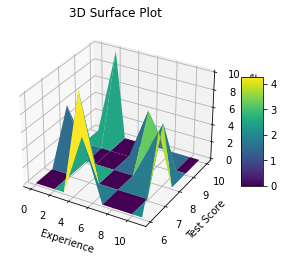

In [68]:
# Prepare the data for 3D plotting
x = df['experience']
y = df['test_score']
z = df['interview_score']
salary = df['salary']

# Create a meshgrid for 3D plotting
X, Y = np.meshgrid(np.unique(x), np.unique(y))
Z = np.zeros_like(X)
for i in range(len(x)):
    ix = np.where(np.unique(x) == x[i])[0][0]
    iy = np.where(np.unique(y) == y[i])[0][0]
    Z[iy, ix] = z[i]

# Create the figure and axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a surface plot
surf = ax.plot_surface(X, Y, Z, cmap='viridis')

# Set labels and title
ax.set_xlabel('Experience')
ax.set_ylabel('Test Score')
ax.set_zlabel('Interview Score')
ax.set_title('3D Surface Plot')

# Add a colorbar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Show the plot
plt.show()
